# Business Objective
Our company is expanding its portfolio by entering the aviation industry, with plans to purchase and operate airplanes for both commercial and private enterprises. However, the company lacks expertise in assessing the potential risks associated with aircraft operations. This analysis aims to identify the aircraft models with the lowest risk profiles to guide the head of the new aviation division in making informed purchasing decisions.

# Aviation Data Analysis Project
This notebook analyzes aviation accident and incident data from the `Aviation_Data.csv` file. The dataset contains information about aviation events. The goal is to explore the data, identify patterns, assess key risk factors, visualize key insights to recommend specific aircraft for purchase, prioritizing those with the best safety records.



![Airplane flying over Aviation Analysis dashboard](Aviation.jpg)

Let's do this 💪💪

## Step 1: Import Libraries
We will use the following Python libraries:
- `pandas` and `numpy` for data manipulation and analysis
- `matplotlib` and `seaborn` for visualizations

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Load the Dataset
Load the `Aviation_Data.csv` file into a pandas DataFrame and inspect its structure.

In [147]:
# Load the dataset
# As a result of this error during importing, "DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.",

df = pd.read_csv('Aviation_Data.csv', low_memory=False)

# Display the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Step 3: Data Exploration
Examining the dataset's structure and data types. 

Check for missing values.

In [148]:
# Display basic information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

From the above information, we can tell the below:
1. RangeIndex: 90348 entries
   We have 90348 rows and any column that has less than that `Non-Null Count` as presented above, is proof of missing values.
2. Data columns (total 31 columns):
   We have 31 columns.
3. Data types:
   With exception of `Number.of.Engines`, `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured` that have a           `float64`, all the other columns have an `object` data type.

In [149]:
# Check for missing values
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [150]:
# Check for missing values in %
df.isnull().mean() *100

Event.Id                   1.614867
Investigation.Type         0.000000
Accident.Number            1.614867
Event.Date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport.Code              44.512330
Airport.Name              41.665560
Injury.Severity            2.721698
Aircraft.damage            5.150086
Aircraft.Category         64.263736
Registration.Number        3.144508
Make                       1.684597
Model                      1.716695
Amateur.Built              1.727764
Number.of.Engines          8.348829
Engine.Type                9.468942
FAR.Description           64.555939
Schedule                  86.073848
Purpose.of.flight          8.468367
Air.carrier               81.573471
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Weather.Condition          6

# Step 4: Data Preprocessing and Data Visualization

## Step 1: Select the appropriate data to help us uncover the insights

In [151]:
# Filter for airplanes (exclude helicopters, gliders,...) and non-amateur-built aircraft
# Amateur-built aircraft are Aircraft built by individuals, often from kits or plans, for education or recreation.
# This is specifically to narrow down to our business need

df = df[(df['Aircraft.Category'] == 'Airplane') & (df['Amateur.Built'] == 'No')]

In [152]:
df.shape

(24417, 31)

In [153]:
# Select relevant columns
columns = ['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country', 'Injury.Severity',
           'Aircraft.damage', 'Aircraft.Category', 'Airport.Name', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines',
           'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
           'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight']

df = df[columns]

In [154]:
df['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    18981
Destroyed       3144
Minor            925
Unknown           97
Name: count, dtype: int64

In [155]:
df['Weather.Condition'].value_counts()

Weather.Condition
VMC    19711
IMC     1363
Unk      215
UNK      149
Name: count, dtype: int64

In [156]:
df['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing        2073
Takeoff        1132
Cruise          760
Approach        556
Maneuvering     455
Taxi            232
Descent         163
Climb           143
Go-around       143
Standing         73
Unknown          55
Other            11
Name: count, dtype: int64

In [157]:
df['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     13339
Instructional                 3120
Aerial Application            1066
Unknown                        838
Business                       764
Positioning                    350
Aerial Observation             170
Skydiving                      166
Ferry                          163
Other Work Use                 155
Executive/corporate            148
Flight Test                    120
Banner Tow                      89
Public Aircraft - Federal       52
Air Race show                   48
Public Aircraft                 42
Glider Tow                      35
Public Aircraft - State         24
Firefighting                    17
Public Aircraft - Local         12
ASHO                             5
Air Race/show                    4
Air Drop                         3
PUBS                             3
External Load                    1
Name: count, dtype: int64

In [158]:
df['Model'].value_counts()

Model
172                  869
152                  449
737                  403
182                  344
172N                 315
                    ... 
AA-5 Traveler          1
Sportstar-Evektor      1
PA 28-151              1
T211 Thorpedo          1
GALEB G 2              1
Name: count, Length: 3779, dtype: int64

In [159]:
df['Make'].value_counts()

Make
CESSNA                   4867
Cessna                   3576
PIPER                    2803
Piper                    1897
BOEING                   1037
                         ... 
HOLLAND MIKE                1
ECLIPSE AEROSPACE INC       1
BEARHAWK                    1
SCOTT TERRY G               1
PERYERA ARNET               1
Name: count, Length: 1382, dtype: int64

In [160]:
df['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane    24417
Name: count, dtype: int64

In [161]:
# Handle missing values for Quantitative data
# Handle missing values for injuries and damage
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0)
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(0)

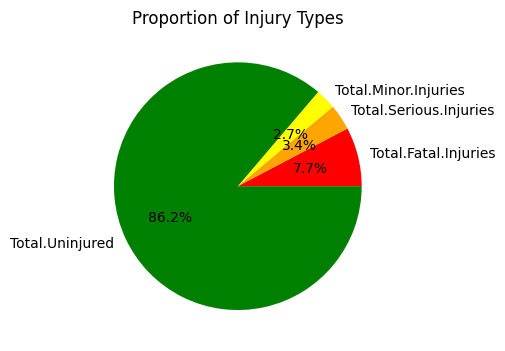

In [162]:
# Let's understand the distribution of those injured
injury_totals = df[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].sum()
injury_totals.plot(kind='pie',autopct='%1.1f%%',colors=['red', 'orange', 'yellow', 'green'],figsize=(5, 5))

plt.title('Proportion of Injury Types')
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()
plt.show()

In [163]:
# Handle missing values for Qualitative data
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')
df['Weather.Condition'] = df['Weather.Condition'].fillna('UNK')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('Unknown')

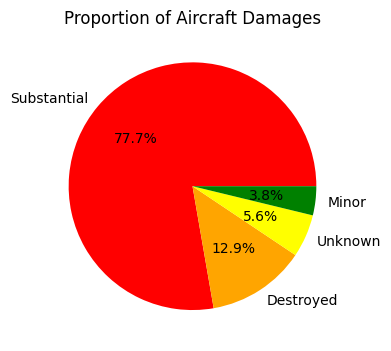

In [164]:
# Proportion of aircraft damages on number of accidents
aircraft_damage = df['Aircraft.damage'].value_counts()

aircraft_damage.plot(kind='pie',autopct='%1.1f%%',colors=['red', 'orange', 'yellow', 'green'],figsize=(4, 4))

plt.title('Proportion of Aircraft Damages')
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()
plt.show()

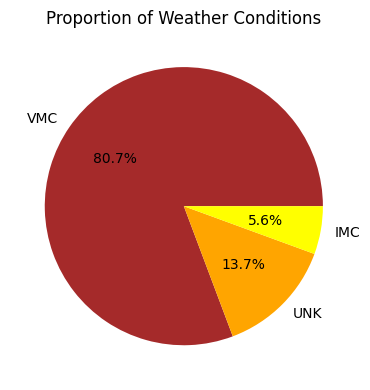

In [165]:
# The below code is added after realizing that the pie sub-divides because of different cases.
df['Weather.Condition'] = df['Weather.Condition'].str.upper()

# Proportion of Weather Conditions on number of accidents
weather_conditions = df['Weather.Condition'].value_counts()

weather_conditions.plot(kind='pie',autopct='%1.1f%%',colors=['brown', 'orange', 'yellow', 'green'],figsize=(4, 4))

plt.title('Proportion of Weather Conditions')
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()
plt.show()

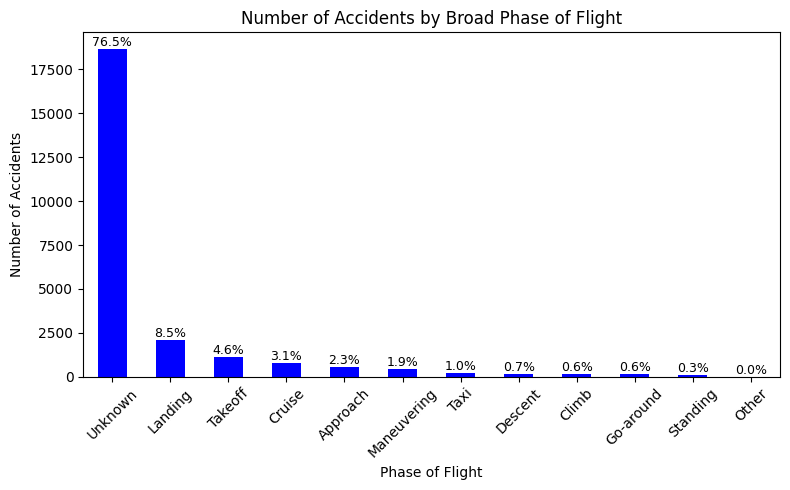

In [166]:
# Count each phase
flight_phases = df['Broad.phase.of.flight'].value_counts()

# Total number of accidents
total = flight_phases.sum()

# Plot bar chart
ax = flight_phases.plot(
    kind='bar',
    color='blue',
    figsize=(8, 5)
)

# Add percentage labels on top of each bar
for i, value in enumerate(flight_phases):
    percentage = (value / total) * 100
    ax.text(i, value + 1, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9)

# Labels and title
plt.title('Number of Accidents by Broad Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This is a good column, however about 77% of it's data is unknown.  

In [167]:
# Standardize text fields
df['Make'] = df['Make'].str.title().str.strip()
df['Model'] = df['Model'].str.upper().str.strip()
df['Aircraft.Category'] = df['Aircraft.Category'].str.title().str.strip()

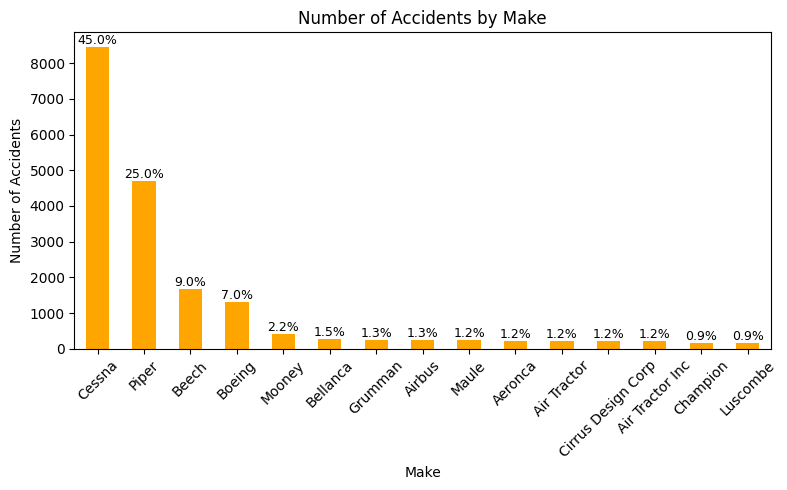

In [168]:
# Proportion of top 15 makes
# Count each phase
makes = df['Make'].value_counts().head(15)

# Total number of accidents
total = makes.sum()

# Plot bar chart
ax = makes.plot(
    kind='bar',
    color='orange',
    figsize=(8, 5)
)

# Add percentage labels on top of each bar
for i, value in enumerate(makes):
    percentage = (value / total) * 100
    ax.text(i, value + 1, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9)

# Labels and title
plt.title('Number of Accidents by Make')
plt.xlabel('Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


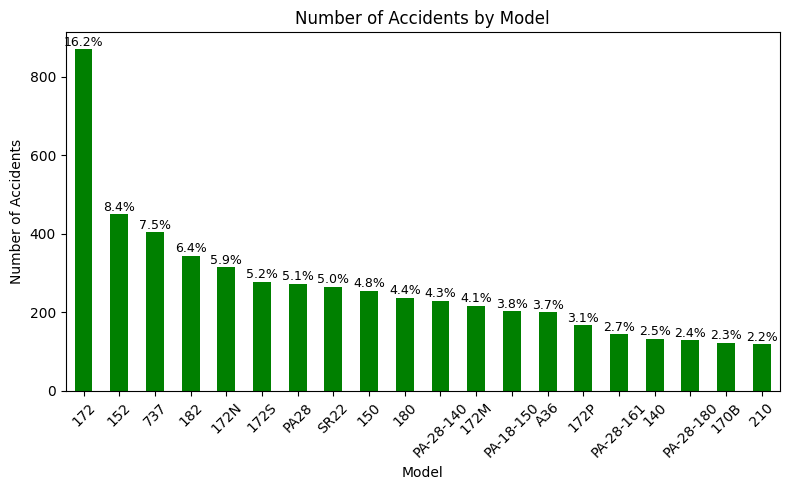

In [169]:
# Proportion of top 20 models
# Count each phase
makes = df['Model'].value_counts().head(20)

# Total number of accidents
total = makes.sum()

# Plot bar chart
ax = makes.plot(
    kind='bar',
    color='green',
    figsize=(8, 5)
)

# Add percentage labels on top of each bar
for i, value in enumerate(makes):
    percentage = (value / total) * 100
    ax.text(i, value + 1, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9)

# Labels and title
plt.title('Number of Accidents by Model')
plt.xlabel('Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Confirmation we are working with aeroplanes only 😅

In [172]:
df['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane    24417
Name: count, dtype: int64

Good 😊

## Step 2: Define Risk Metrics

In [173]:
# Calculate total injuries
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']

In [174]:
# Assign numerical scores to damage severity
damage_scores = {'Destroyed': 3, 'Substantial': 2, 'Minor': 1, 'Unknown': 0, 'None': 0}
df['Damage.Score'] = df['Aircraft.damage'].map(damage_scores)

In [175]:
# Create a risk score: weighted sum of fatal injuries (x3), serious injuries (x2), minor injuries (x1), and damage score
df['Risk.Score'] = (3 * df['Total.Fatal.Injuries'] + 2 * df['Total.Serious.Injuries'] +
                      df['Total.Minor.Injuries'] + df['Damage.Score'])


## Step 3: Risk Analysis

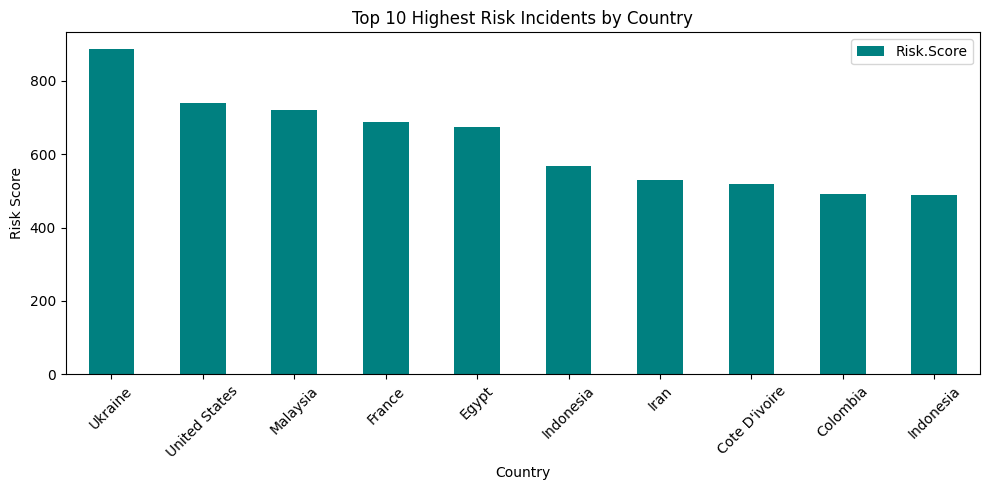

In [186]:
top_risks = df.sort_values('Risk.Score', ascending=False).head(10)

top_risks.plot(
    x='Country',  
    y='Risk.Score',
    kind='bar',
    color='teal',
    figsize=(10, 5)
)

plt.title('Top 10 Highest Risk Incidents by Country')
plt.xlabel('Country')
plt.ylabel('Risk Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


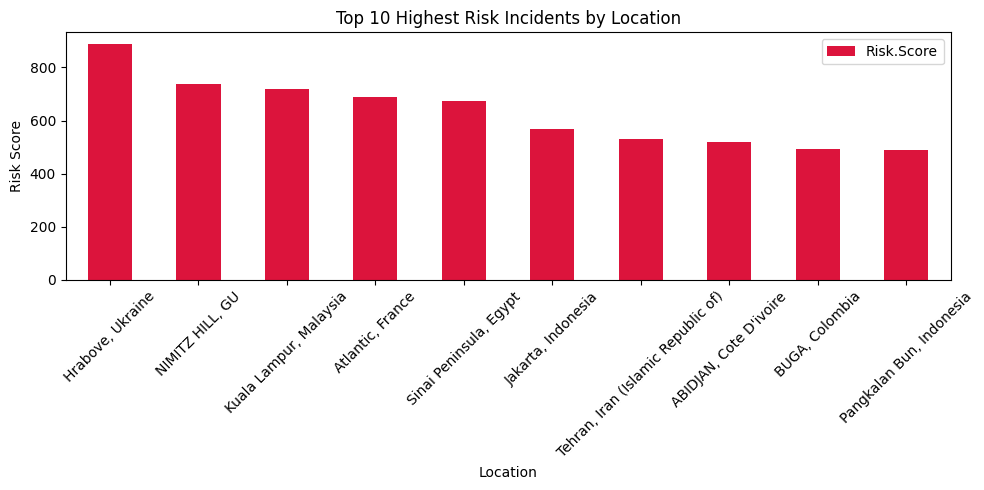

In [187]:
top_risks = df.sort_values('Risk.Score', ascending=False).head(10)

top_risks.plot(
    x='Location',  
    y='Risk.Score',
    kind='bar',
    color='crimson',
    figsize=(10, 5)
)

plt.title('Top 10 Highest Risk Incidents by Location')
plt.xlabel('Location')
plt.ylabel('Risk Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

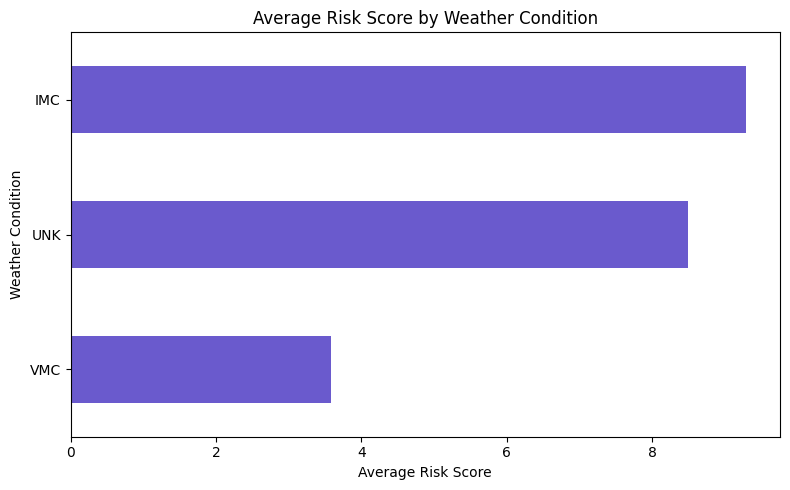

In [188]:
# Risk Score by Weather Conditions
avg_risk_weather = df.groupby('Weather.Condition')['Risk.Score'].mean().sort_values()

avg_risk_weather.plot(kind='barh', figsize=(8, 5), color='slateblue')

plt.title('Average Risk Score by Weather Condition')
plt.xlabel('Average Risk Score')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()


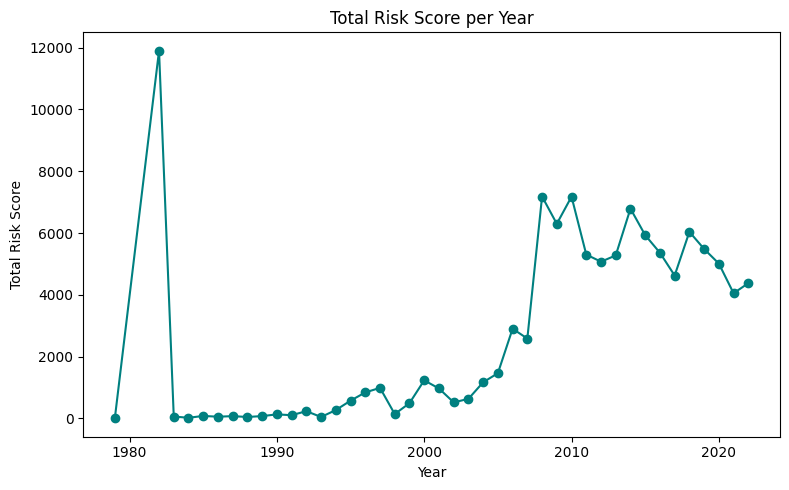

In [189]:
# Risk trend over time
df['Event.Year'] = pd.to_datetime(df['Event.Date']).dt.year

risk_trend = df.groupby('Event.Year')['Risk.Score'].sum()

risk_trend.plot(kind='line', marker='o', color='teal', figsize=(8, 5))

plt.title('Total Risk Score per Year')
plt.xlabel('Year')
plt.ylabel('Total Risk Score')
plt.tight_layout()
plt.show()


In [ ]:
# Group by Make and Model
risk_by_model = df.groupby(['Make', 'Model']).agg({
    'Event.Id': 'count',
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum',
    'Risk.Score': 'mean'
}).rename(columns={'Event.Id': 'Accident.Count'}).reset_index()

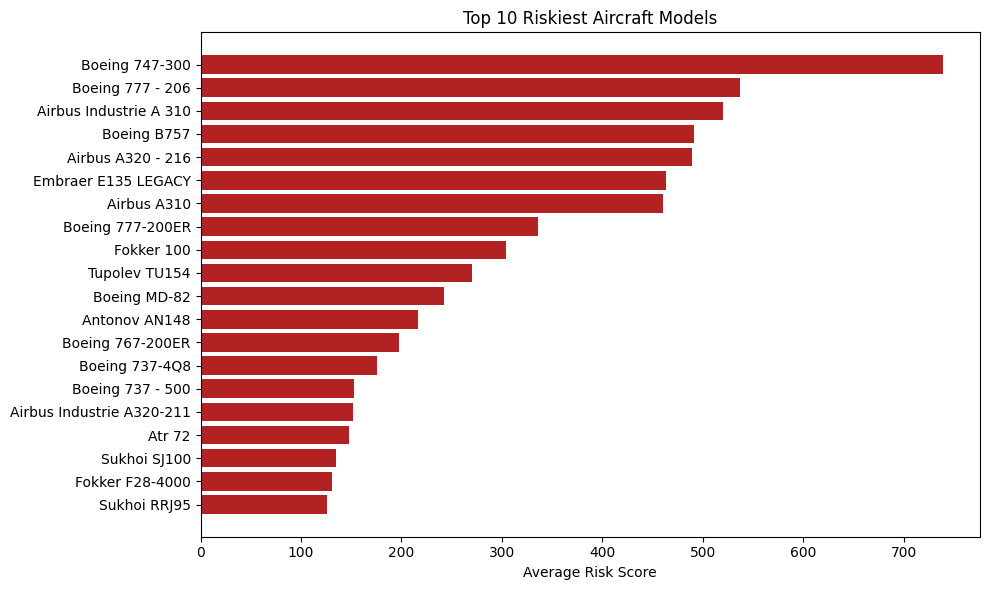

In [197]:
# Top 20 Riskiest Aircraft Models (by Average Risk Score)
top_risk_models = risk_by_model.sort_values('Risk.Score', ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(
    top_risk_models['Make'] + ' ' + top_risk_models['Model'],
    top_risk_models['Risk.Score'],
    color='firebrick'
)
plt.xlabel('Average Risk Score')
plt.title('Top 10 Riskiest Aircraft Models')
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()


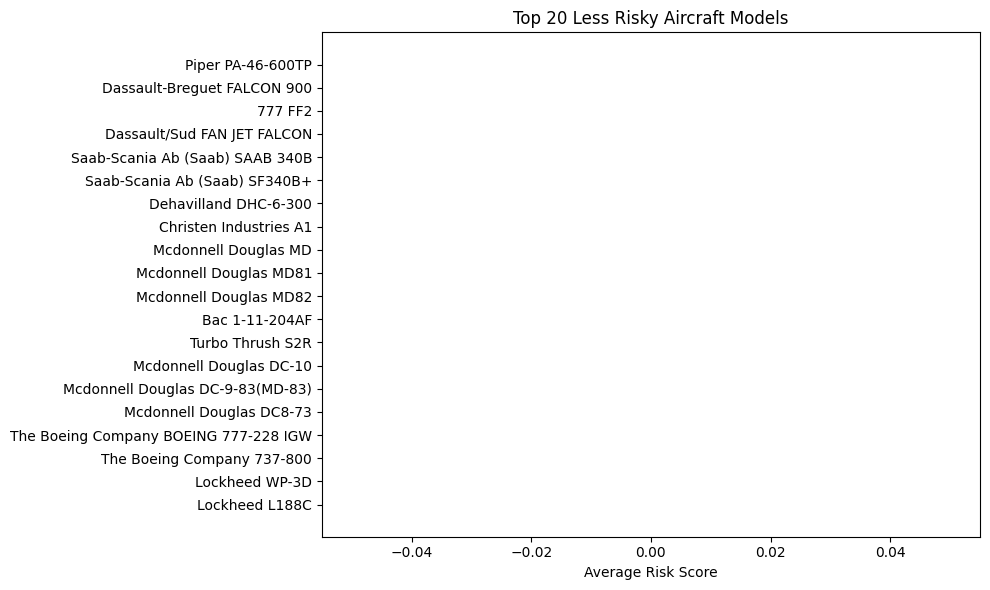

In [199]:
# Top 20 Less Riskiest Aircraft Models (by Average Risk Score)
top_risk_models = risk_by_model.sort_values('Risk.Score', ascending=True).head(20)

plt.figure(figsize=(10, 6))
plt.barh(
    top_risk_models['Make'] + ' ' + top_risk_models['Model'],
    top_risk_models['Risk.Score'],
    color='firebrick'
)
plt.xlabel('Average Risk Score')
plt.title('Top 20 Less Risky Aircraft Models')
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()


In [201]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Airport.Name', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines',
       'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Total.Injuries',
       'Damage.Score', 'Risk.Score', 'Event.Year'],
      dtype='object')

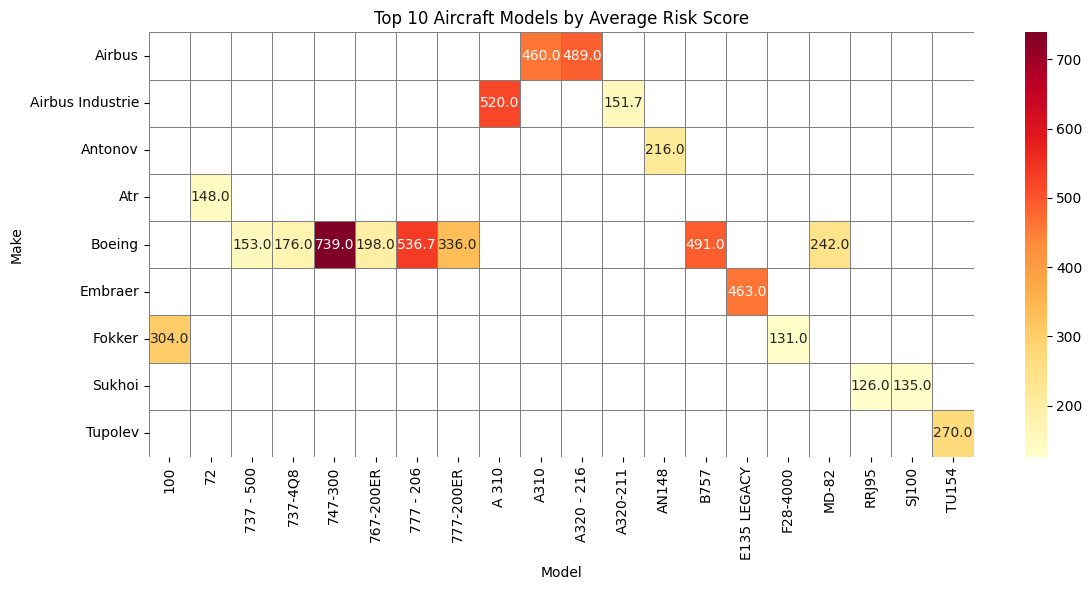

In [212]:
#  top_20_risk by make and model
top_20_risk = risk_by_model.sort_values('Risk.Score', ascending=False).head(20)

# Pivot only the top 20 rows
pivot = top_20_risk.pivot_table(index='Make', columns='Model', values='Risk.Score')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, cmap='YlOrRd', fmt='.1f', linewidths=0.5, linecolor='gray')
plt.title('Top 10 Aircraft Models by Average Risk Score')
plt.xlabel('Model')
plt.ylabel('Make')
plt.tight_layout()
plt.show()



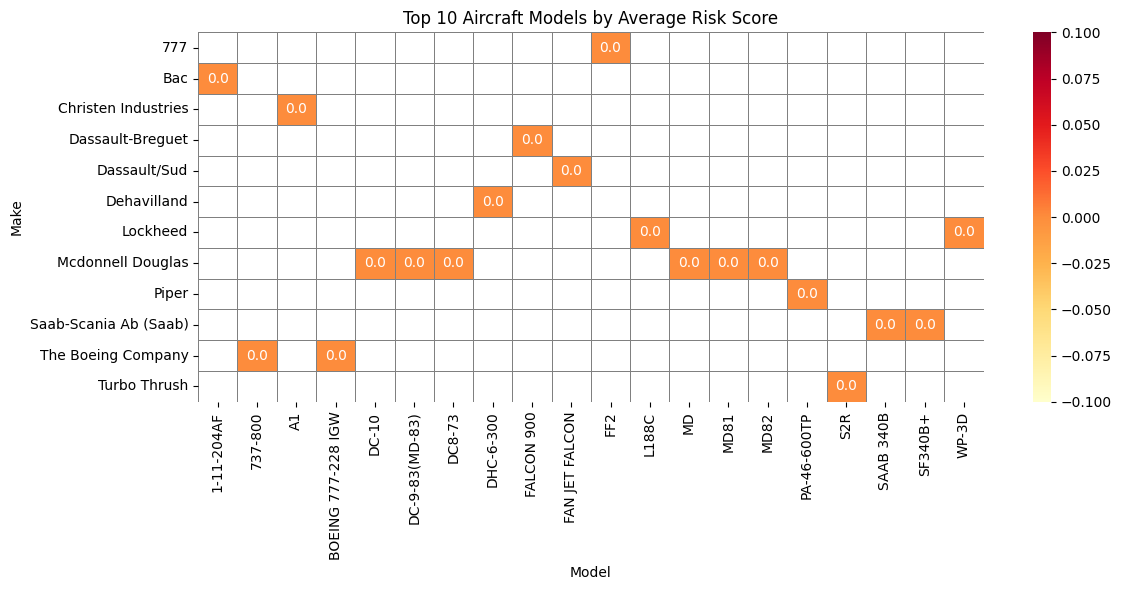

In [213]:
#  bottom_20_risk by make and model
bottom_20_risk = risk_by_model.sort_values('Risk.Score', ascending=True).head(20)

# Pivot only the bottom 20 rows
pivot = bottom_20_risk.pivot_table(index='Make', columns='Model', values='Risk.Score')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, cmap='YlOrRd', fmt='.1f', linewidths=0.5, linecolor='gray')
plt.title('Top 10 Aircraft Models by Average Risk Score')
plt.xlabel('Model')
plt.ylabel('Make')
plt.tight_layout()
plt.show()


In [214]:
# Risk by purpose of flight
risk_by_purpose = df.groupby('Purpose.of.flight').agg({
    'Event.Id': 'count',
    'Total.Fatal.Injuries': 'sum',
    'Risk.Score': 'mean'
}).rename(columns={'Event.Id': 'Accident.Count'}).reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_16768\3747486896.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


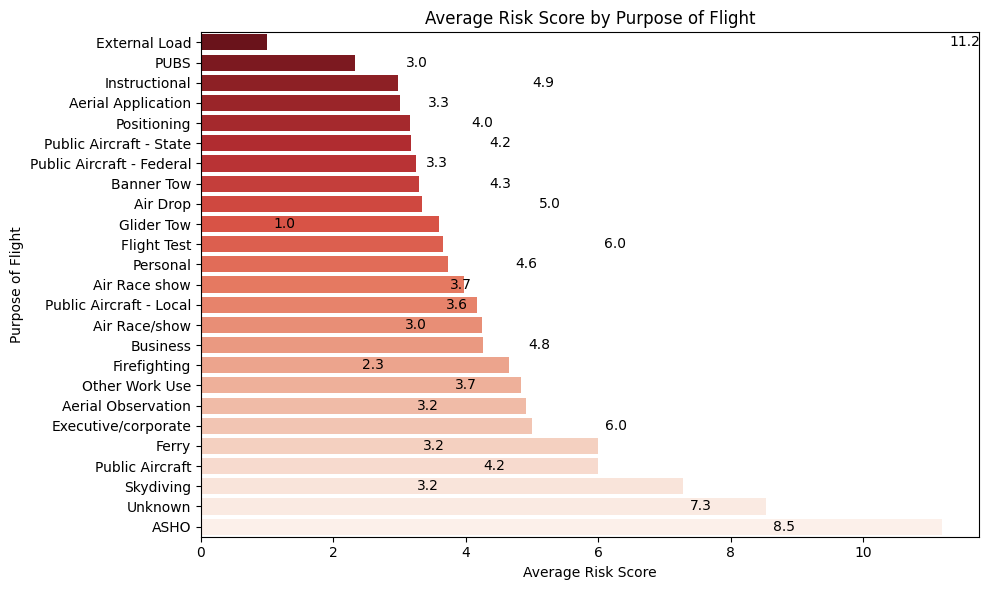

In [215]:
# Risk by Purpose of Flight Visual
risk_by_purpose = risk_by_purpose.sort_values('Risk.Score', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=risk_by_purpose,
    x='Risk.Score',
    y='Purpose.of.flight',
    palette='Reds_r'
)

# Add values on bars
for index, row in risk_by_purpose.iterrows():
    plt.text(row['Risk.Score'] + 0.1, index, f"{row['Risk.Score']:.1f}", va='center')

plt.title('Average Risk Score by Purpose of Flight')
plt.xlabel('Average Risk Score')
plt.ylabel('Purpose of Flight')
plt.tight_layout()
plt.show()

In [ ]:
# Risk by weather condition
risk_by_weather = df.groupby('Weather.Condition').agg({
    'Event.Id': 'count',
    'Total.Fatal.Injuries': 'sum',
    'Risk.Score': 'mean'
}).rename(columns={'Event.Id': 'Accident.Count'}).reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_16768\3469060721.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


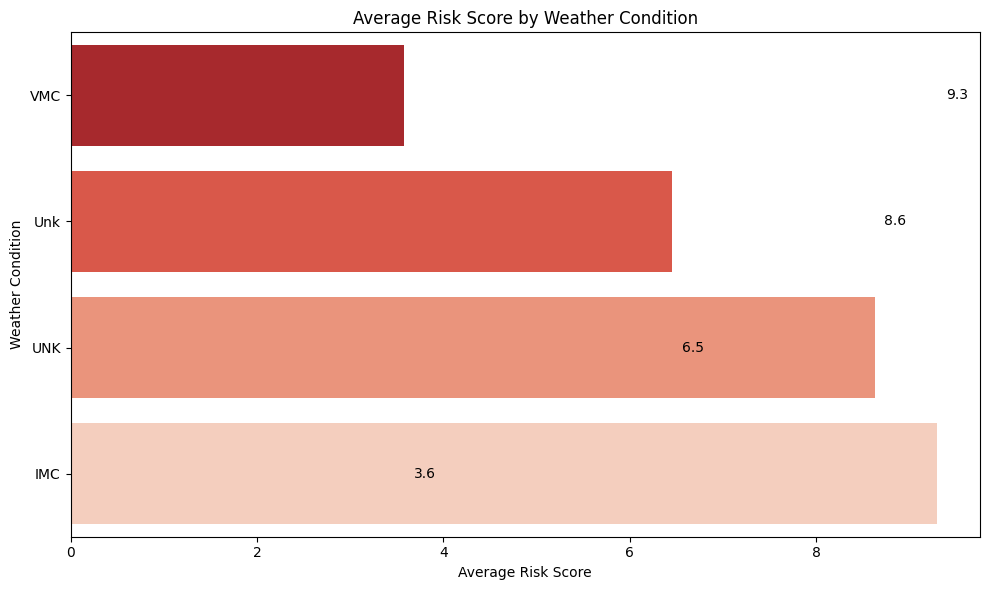

In [218]:
# Risk by Weather Condition Visual
risk_by_weather = risk_by_weather.sort_values('Risk.Score', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=risk_by_weather,
    x='Risk.Score',
    y='Weather.Condition',
    palette='Reds_r'
)

# Add values on bars
for index, row in risk_by_weather.iterrows():
    plt.text(row['Risk.Score'] + 0.1, index, f"{row['Risk.Score']:.1f}", va='center')

plt.title('Average Risk Score by Weather Condition')
plt.xlabel('Average Risk Score')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()


## Step 4: Output Results

In [224]:
print("✅ Top 5 Lowest-Risk Aircraft Models:")
print(risk_by_model[['Make', 'Model', 'Total.Fatal.Injuries','Accident.Count','Risk.Score']].head(5))

print("\n✅ Risk by Purpose of Flight:")
print(risk_by_purpose.sort_values('Risk.Score', ascending=True)[[
    'Purpose.of.flight', 'Accident.Count', 'Total.Fatal.Injuries', 'Risk.Score'
]].head())

print("\n✅ Risk by Weather Condition:")
print(risk_by_weather.sort_values('Risk.Score', ascending=True)[[
    'Weather.Condition', 'Accident.Count', 'Total.Fatal.Injuries', 'Risk.Score'
]].head())


✅ Top 5 Lowest-Risk Aircraft Models:
          Make           Model  Total.Fatal.Injuries  Accident.Count  \
0    177Mf Llc  PITTS MODEL 12                   0.0               1   
1  2021Fx3 Llc        CCX-2000                   0.0               1   
2       3Xtrim       450 ULTRA                   1.0               1   
3          737             800                   0.0               2   
4          777             FF2                   0.0               1   

   Risk.Score  
0         6.0  
1         2.0  
2         7.0  
3         1.0  
4         0.0  

✅ Risk by Purpose of Flight:
     Purpose.of.flight  Accident.Count  Total.Fatal.Injuries  Risk.Score
9        External Load               1                   0.0    1.000000
16                PUBS               3                   0.0    2.333333
14       Instructional            3120                 509.0    2.975641
1   Aerial Application            1066                 153.0    3.003752
18         Positioning             350 